gradient


## imports 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow

## we use convolution function from previous exercise 

In [ ]:
def convolution1(image, kernel):


  pixels = []
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      pixels.append(image[i,j]);

  pixels = np.array(pixels).reshape(image.shape[0],image.shape[1]);

  pixels = np.insert(pixels , [0,image.shape[0]] , np.zeros(len(pixels[0])) , axis = 0);
  pixels = np.insert(pixels , [0,image.shape[1]] , np.zeros((len(pixels[:, 0]) ,1)) , axis = 1);

  convoluted_matrix = [];
  for i in range(1,image.shape[0]):
    for j in range(1,image.shape[1]):
     temp = pixels[i:i+3 , j:j+3]
     product = np.multiply(temp,kernel)
     convoluted_matrix.append(sum(sum(product)));

  convoluted_matrix = np.array(convoluted_matrix).reshape(image.shape[0]-1,image.shape[1]-1);

  return(convoluted_matrix)

## now we import our images

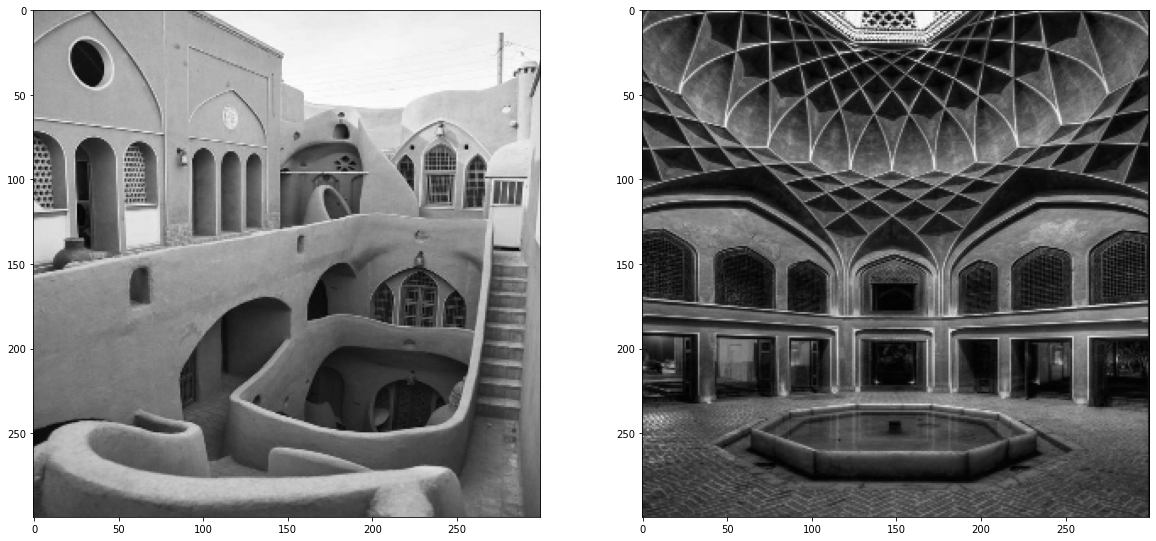

In [ ]:
img = cv2.imdecode(np.asarray(bytearray(urllib.request.urlopen('https://preview.redd.it/tnv0c5xyz0u81.jpg?auto=webp&s=ef0d0ce9c0d44f42f9e6f004b9bcbc29dabe67bf').read()), dtype=np.uint8), 0)
img = cv2.resize(img, (300,300))

img1 = cv2.imdecode(np.asarray(bytearray(urllib.request.urlopen('https://preview.redd.it/bkxit344h8391.jpg?width=640&crop=smart&auto=webp&s=49c2be340dd973150d7da3894d278701a803a064').read()), dtype=np.uint8), 0)
img1 = cv2.resize(img1, (300,300))


fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.add_subplot(1,2,1)
plt.imshow(img,'gray')
fig.add_subplot(1,2,2)
plt.imshow(img1,'gray')



## Now we are going to calculate the gradient of our images


we can calculate the gradient using the horizontal and vertical Sobel masks, first, we convolve the image with horizontal and vertical Sobel masks, and then we calculate the square root of the sum of the square of our Sobel mask convolution outputs


To find the angles, we should calculate the inverse tangent of the vertical Sobel mask \ the horizontal Sobel mask


θ = tan^-1 (vertical Sobel mask \ horizontal Sobel mask)

In [ ]:
sobelx = np.array([[-1, -2, -1], 
                   [0, 0, 0],
                   [1, 2, 1]]);
                   
sobely = np.array([[-1, 0, 1], 
                   [-2, 0, 2],
                   [-1, 0, 1]]);

In [ ]:
sobelx1 = convolution1(img, sobelx);
sobelx2 = convolution1(img1, sobelx);
sobely1 = convolution1(img, sobely);
sobely2 = convolution1(img1, sobely);

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

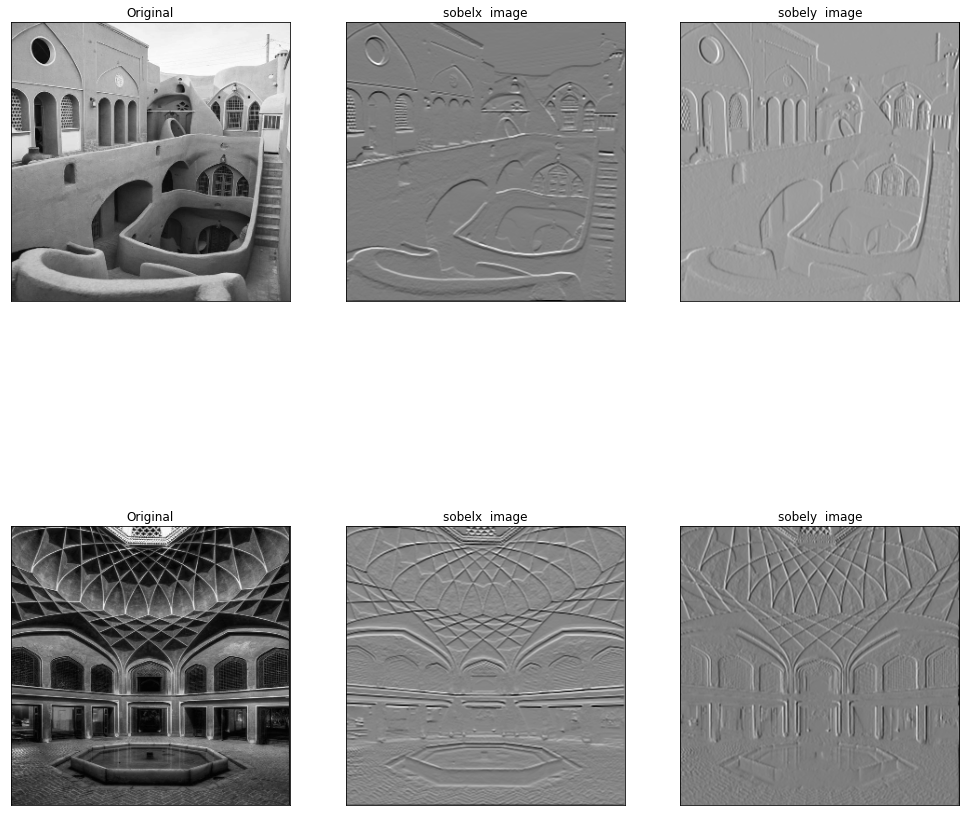

In [ ]:
fig = plt.figure()
fig.set_figheight(17)
fig.set_figwidth(17)
plt.subplot(231),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(sobelx1,'gray'),plt.title('sobelx  image')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(sobely1,'gray'),plt.title('sobely  image')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(img1,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(sobelx2,'gray'),plt.title('sobelx  image')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6),plt.imshow(sobely2,'gray'),plt.title('sobely  image')
plt.xticks([]), plt.yticks([])



now we calculate and display the gradient of our images

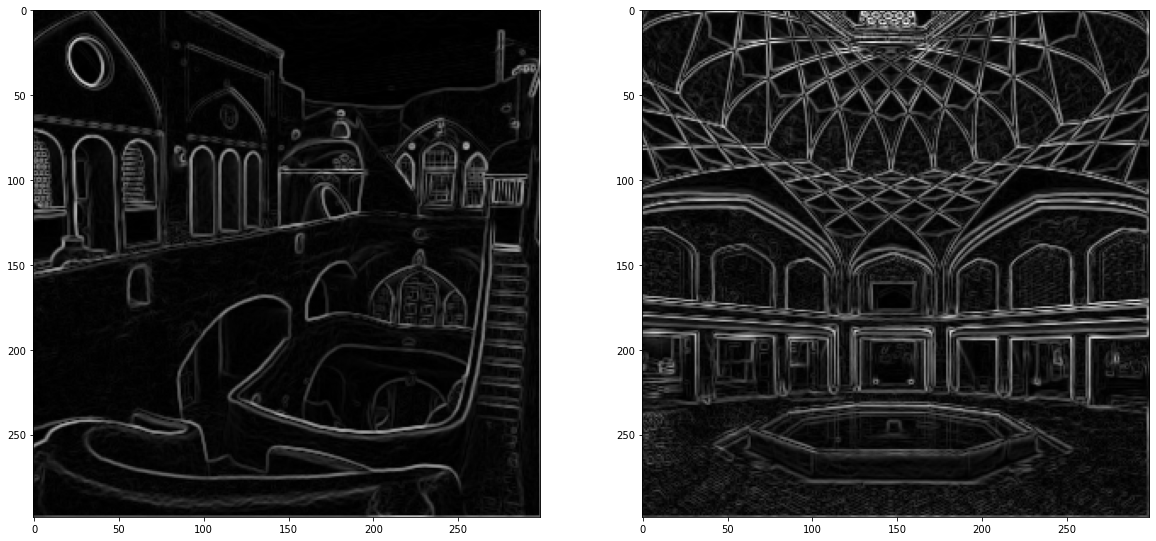

In [ ]:
gradient1 = np.sqrt(sobelx1 ** 2 + sobely1 ** 2)
gradient2 = np.sqrt(sobelx2 ** 2 + sobely2 ** 2)


fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.add_subplot(1,2,1)
plt.imshow(gradient1.astype(np.float64),'gray')
fig.add_subplot(1,2,2)
plt.imshow(gradient2.astype(np.float64),'gray')

## Now we calculate gradient orientations and angles of our image

In [ ]:
gradient_angles1 = np.arctan2(sobely1,sobelx1) 
gradient_angles1 = np.degrees(gradient_angles1) # to convert arctan outputs into degrees - Convert angles from radians to degrees

gradient_angles2 = np.arctan2(sobely2,sobelx2) 
gradient_angles2 = np.degrees(gradient_angles2) # to convert arctan outputs into degrees - Convert angles from radians to degrees

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8ba1023730>,
 Text(0.5, 1.0, 'gradient_angles img2'))

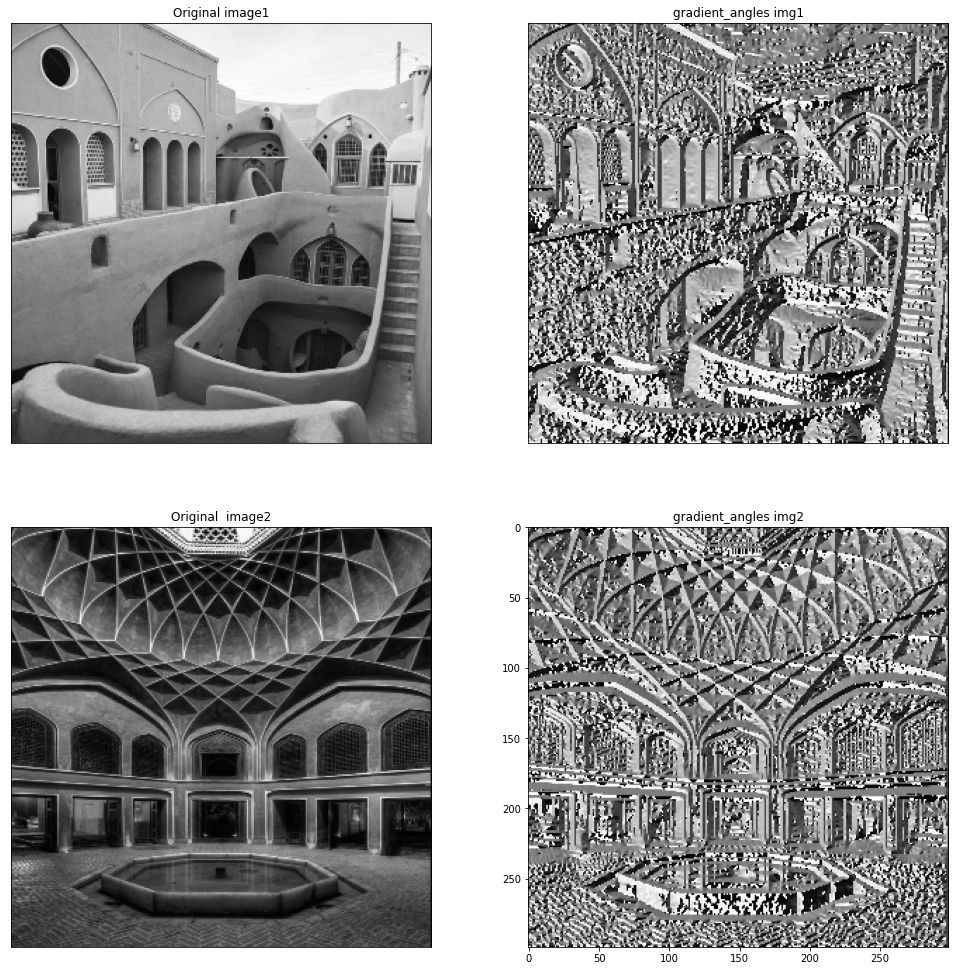

In [ ]:
fig = plt.figure()
fig.set_figheight(17)
fig.set_figwidth(17)
plt.subplot(221),plt.imshow(img,'gray'),plt.title('Original image1')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(gradient_angles1,'gray'),plt.title('gradient_angles img1')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img1,'gray'),plt.title('Original  image2')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(gradient_angles2,'gray'),plt.title('gradient_angles img2')

 🏁 Done 🏁